In [6]:
# --- 1. Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# --- 2. Load & Clean Data ---
df = pd.read_csv(r"C:\Users\JYOTHI\Downloads\Unemployment in India (1).csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date column
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df = df.fillna(method="ffill")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (768, 7)
           region       date frequency  estimated_unemployment_rate_(%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   estimated_employed  estimated_labour_participation_rate_(%)   area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  Rural  
3          12285693.0                                    43.97  Rural  
4          12256762.0                                    44.68  Rural  


C:\Users\JYOTHI\AppData\Local\Temp\ipykernel_10068\2562711575.py:8: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
C:\Users\JYOTHI\AppData\Local\Temp\ipykernel_10068\2562711575.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [12]:
# --- 3. Exploratory Data Analysis ---
print("\n--- BASIC INFO ---")
print(df.info())

print("\n--- DESCRIPTIVE STATS ---")
print(df.describe())

# Check unique regions
print("\nRegions:", df['region'].nunique(), "->", df['region'].unique())



--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   768 non-null    object        
 1   date                                     768 non-null    datetime64[ns]
 2   frequency                                768 non-null    object        
 3   estimated_unemployment_rate_(%)          768 non-null    float64       
 4   estimated_employed                       768 non-null    float64       
 5   estimated_labour_participation_rate_(%)  768 non-null    float64       
 6   area                                     768 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB
None

--- DESCRIPTIVE STATS ---
                                date  estimated_unemployment_rate_(%)  \
count 

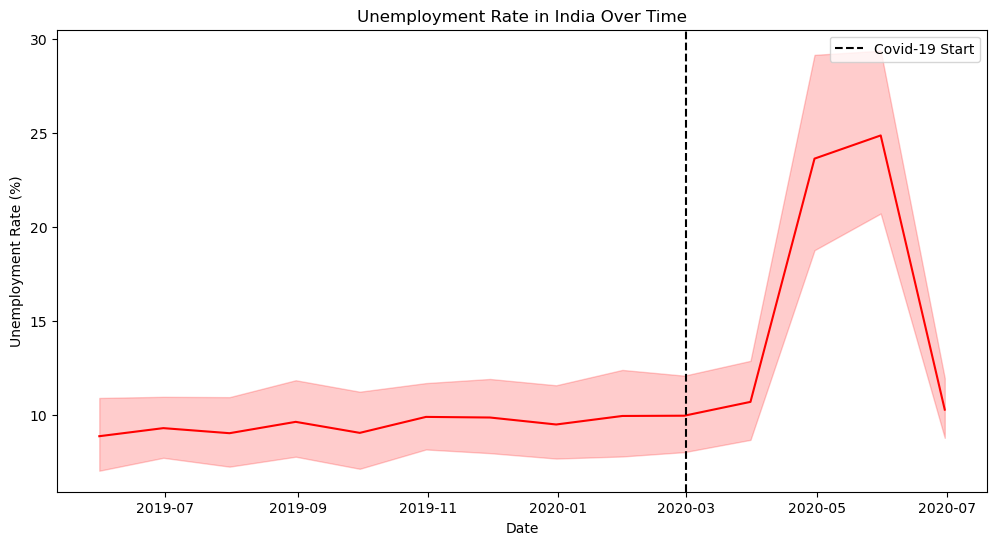

In [14]:
# --- 4. Overall Trend Visualization ---
plt.figure(figsize=(12,6))
sns.lineplot(x="date", y="estimated_unemployment_rate_(%)", data=df, color="red")
plt.axvline(pd.to_datetime("2020-03-01"), color='black', linestyle='--', label="Covid-19 Start")
plt.title("Unemployment Rate in India Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


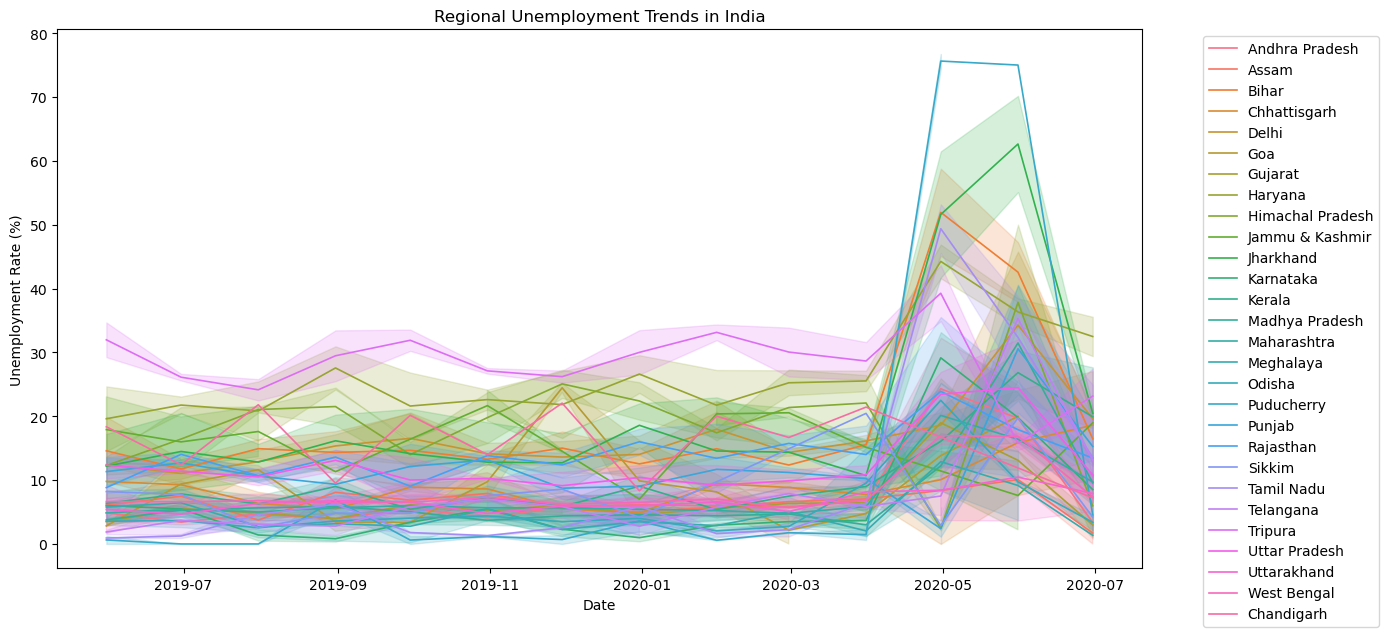

In [16]:
# --- 5. Regional Trends ---
plt.figure(figsize=(14,7))
sns.lineplot(x="date", y="estimated_unemployment_rate_(%)", hue="region", data=df, linewidth=1.2)
plt.title("Regional Unemployment Trends in India")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [18]:
# --- 6. Covid-19 Impact ---
pre_covid = df[df['date'] < "2020-03-01"]['estimated_unemployment_rate_(%)'].mean()
post_covid = df[df['date'] >= "2020-03-01"]['estimated_unemployment_rate_(%)'].mean()

print(f"\nAverage Unemployment before Covid: {pre_covid:.2f}%")
print(f"Average Unemployment after Covid : {post_covid:.2f}%")



Average Unemployment before Covid: 9.51%
Average Unemployment after Covid : 16.52%


C:\Users\JYOTHI\AppData\Local\Temp\ipykernel_10068\1855051065.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")


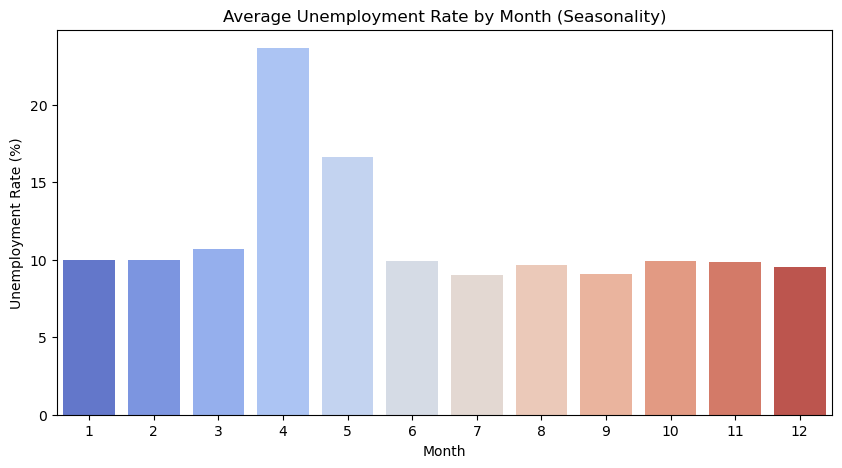

In [20]:
# --- 7. Seasonal / Monthly Analysis ---
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

monthly_avg = df.groupby('month')['estimated_unemployment_rate_(%)'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="coolwarm")
plt.title("Average Unemployment Rate by Month (Seasonality)")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


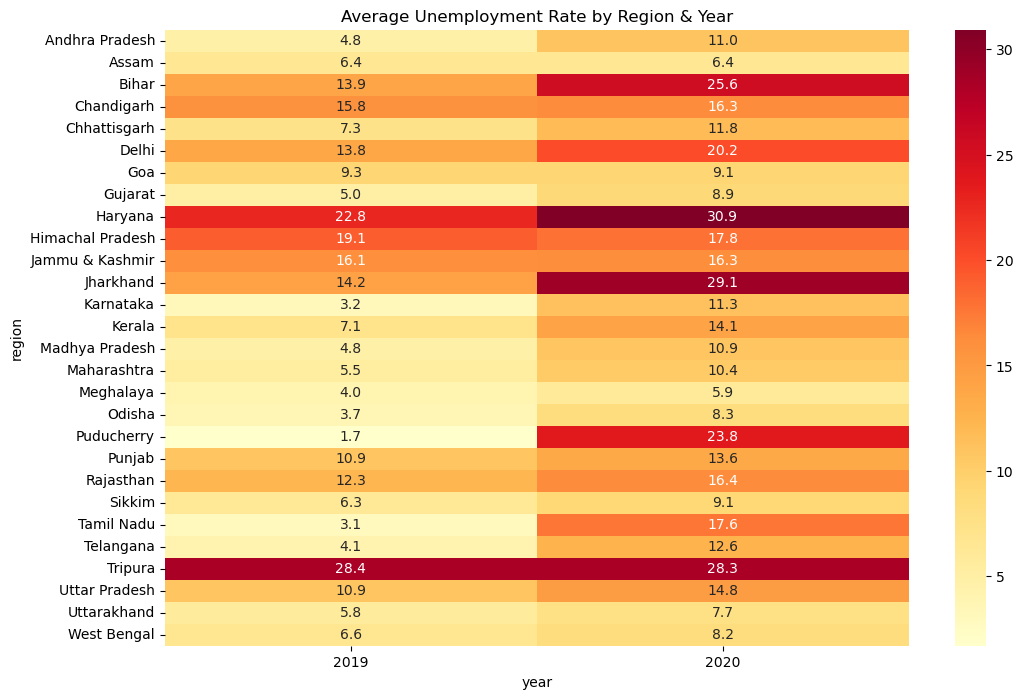

In [22]:
# --- 8. Heatmap by Region & Year ---
pivot = df.pivot_table(values="estimated_unemployment_rate_(%)",
                       index="region",
                       columns="year",
                       aggfunc="mean")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Average Unemployment Rate by Region & Year")
plt.show()


In [24]:
# --- 9. Insights Extraction ---
state_avg = df.groupby('region')['estimated_unemployment_rate_(%)'].mean()

highest_state = state_avg.idxmax()
lowest_state = state_avg.idxmin()

print(f"\nState with Highest Avg Unemployment: {highest_state} ({state_avg.max():.2f}%)")
print(f"State with Lowest Avg Unemployment : {lowest_state} ({state_avg.min():.2f}%)")

print("\nTop 5 States with Highest Unemployment:\n", state_avg.sort_values(ascending=False).head())
print("\nTop 5 States with Lowest Unemployment:\n", state_avg.sort_values().head())



State with Highest Avg Unemployment: Tripura (28.35%)
State with Lowest Avg Unemployment : Meghalaya (4.80%)

Top 5 States with Highest Unemployment:
 region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name: estimated_unemployment_rate_(%), dtype: float64

Top 5 States with Lowest Unemployment:
 region
Meghalaya      4.798889
Odisha         5.657857
Assam          6.428077
Uttarakhand    6.582963
Gujarat        6.663929
Name: estimated_unemployment_rate_(%), dtype: float64
